# Grading matplotlib plots

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from plotchecker import LinePlotChecker, ScatterPlotChecker, BarPlotChecker

## Line plots

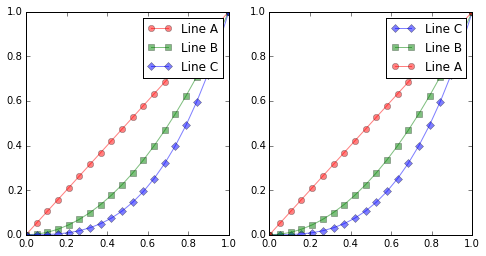

In [4]:
fig, axes = plt.subplots(1, 2)

x = np.linspace(0, 1, 20)[None] * np.ones((3, 20))
y = x ** np.array([1, 2, 3])[:, None]

colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
labels = ['Line A', 'Line B', 'Line C']

# plot some lines
for i in range(3):
    axes[0].plot(x[i], y[i], color=colors[i], marker=markers[i], label=labels[i], alpha=0.5)
axes[0].legend()
    
# plot them in a different order
for i in range(2, -1, -1):
    axes[1].plot(x[i], y[i], color=colors[i], marker=markers[i], label=labels[i], alpha=0.5)
axes[1].legend()

fig.set_size_inches(8, 4)

In [5]:
# run the same assertions on all the plots!
for ax in axes:
    pc = LinePlotChecker(ax)
    pc.assert_num_lines(3)
    pc.find_permutation('labels', labels)
    pc.assert_x_data_equal(x)
    pc.assert_y_data_equal(y)
    pc.assert_colors_equal(colors)
    pc.assert_markers_equal(markers)
    pc.assert_labels_equal(labels)
    pc.assert_alphas_equal([0.5, 0.5, 0.5])
    
print('Success!')

Success!


## Scatter plots

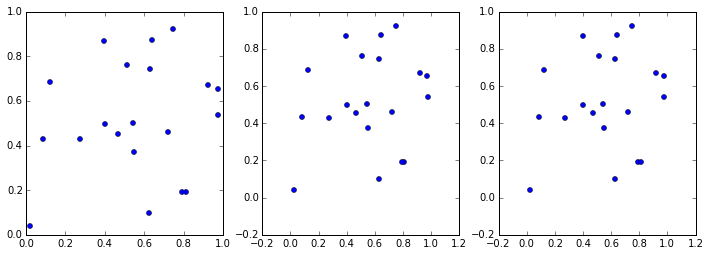

In [6]:
fig, axes = plt.subplots(1, 3)

# make some random data
x = np.random.rand(20)
y = np.random.rand(20)

# create a scatter plot with plot
axes[0].plot(x, y, 'o', color='b', ms=5)

# create a scatter plot with scatter
axes[1].scatter(x, y, s=25, linewidth=0.5)

# create a scatter plot with plot *and* scatter!
axes[2].plot(x[:10], y[:10], 'o', color='b', ms=5)
axes[2].scatter(x[10:], y[10:], s=25, linewidth=0.5)

fig.set_size_inches(12, 4)

In [7]:
# run the same assertions on all the plots!
for ax in axes:
    pc = ScatterPlotChecker(ax)
    pc.assert_x_data_equal(x)
    pc.assert_y_data_equal(y)
    pc.assert_colors_equal('b')
    pc.assert_edgecolors_equal('k')
    pc.assert_edgewidths_equal(0.5)
    pc.assert_sizes_equal(25)
    pc.assert_markersizes_equal(5)
    pc.assert_alphas_equal(1.0)
    
    # can't actually check markers, since they are unrecoverable
    # from plt.scatter :(
    #pc.assert_markers_equal('o')
    
print('Success!')

Success!


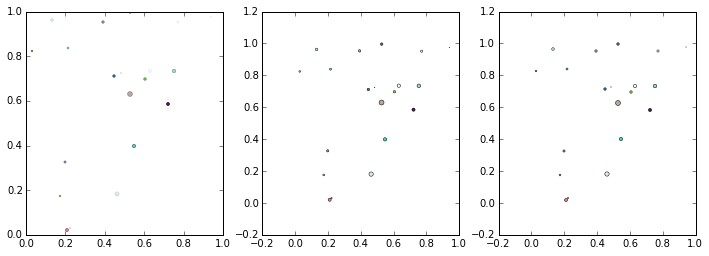

In [8]:
fig, axes = plt.subplots(1, 3)

# make some random data
x = np.random.rand(20)
y = np.random.rand(20)

# choose some random colors and sizes
colors = np.random.rand(20, 4)
sizes = np.random.rand(20) * 5

# create a scatter plot with plot, using a loop
for i in range(20):
    axes[0].plot(x[i], y[i], 'o', color=colors[i], ms=sizes[i])

# create a scatter plot with scatter
axes[1].scatter(x, y, c=colors, s=sizes ** 2, linewidth=0.5)

# create a scatter plot with scatter, using a loop
for i in range(20):
    axes[2].scatter(x[i], y[i], c=colors[i], s=sizes[i] ** 2, linewidth=0.5)

fig.set_size_inches(12, 4)

In [9]:
# run the same assertions on all the plots!
for ax in axes:
    pc = ScatterPlotChecker(ax)
    pc.assert_x_data_equal(x)
    pc.assert_y_data_equal(y)
    pc.assert_colors_equal(colors)
    pc.assert_edgecolors_equal('k')
    pc.assert_edgewidths_equal(0.5)
    pc.assert_sizes_equal(sizes ** 2)
    pc.assert_markersizes_equal(sizes)
    pc.assert_alphas_equal(colors[:, 3])
    
    # can't actually check markers, since they are unrecoverable
    # from plt.scatter :(
    #pc.assert_markers_equal('o')

print('Success!')

Success!


# Bar Plots

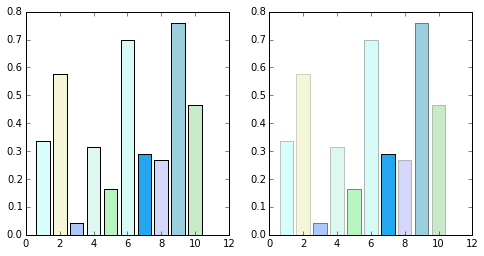

In [10]:
fig, axes = plt.subplots(1, 2)

x = np.arange(1, 11)
y = np.random.rand(10)

colors = np.random.rand(10, 4)
alphas = colors[:, 3]

# plot some bars
for i in range(len(x)):
    axes[0].bar(x[i], y[i], align='center', color=colors[i])

# plot them in a different order
idx = np.arange(len(x))
np.random.shuffle(idx)
for i in idx:
    axes[1].bar(x[i] - 0.4, y[i], color=colors[i, :3], alpha=alphas[i])
    
fig.set_size_inches(8, 4)

In [11]:
# run the same assertions on all the plots!
for ax in axes:
    pc = BarPlotChecker(ax)
    pc.assert_centers_equal(x)
    pc.assert_heights_equal(y)
    pc.assert_widths_equal(0.8)
    pc.assert_bottoms_equal(0)
    pc.assert_colors_equal(colors)
    pc.assert_edgecolors_equal('k')
    pc.assert_alphas_equal(alphas)
    pc.assert_linewidths_equal(1)

print('Success!')

Success!
